In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch import tensor

In [2]:
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
from torch.utils.data import DataLoader

In [4]:
dtype = torch.float
if torch.backends.mps.is_available():
    device = torch.device('mps')
    print("Using GPU: Metal Performance Shaders (MPS)")
else:
    device = torch.device('cpu')
    print("Using CPU")

# Tensor creation
x = tensor([1.0, 2.0, 3.0], device=device, dtype=dtype)
print(f"Tensor: {x}, Device: {x.device}")

Using GPU: Metal Performance Shaders (MPS)
Tensor: tensor([1., 2., 3.], device='mps:0'), Device: mps:0


In [5]:
# Is MPS even available? macOS 12.3+
print(torch.backends.mps.is_available())
# Was the current version of PyTorch built with MPS activated?
print(torch.backends.mps.is_built())

True
True


In [6]:
train_data = datasets.FashionMNIST('.data',train=True,download=True)

In [7]:
len(train_data)

60000

In [8]:
print(train_data.data.shape)
print(train_data.targets.shape)
print(train_data.classes)
print(train_data.class_to_idx)

torch.Size([60000, 28, 28])
torch.Size([60000])
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [9]:
train_data[0][0]

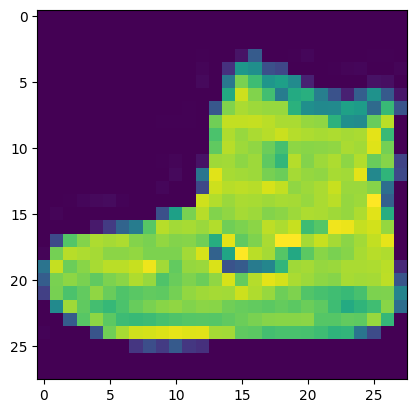

In [10]:
plt.imshow(train_data[0][0]) #1x28x28 image

In [11]:
#Transforms
transform = transforms.ToTensor()
tranform1 = transforms.Compose((transforms.ToTensor(),transforms.Normalize((0.5),(0.5))))

In [12]:
type(train_data.data[0])

torch.Tensor

In [13]:
train_data = datasets.FashionMNIST('.data',train=True,transform=tranform1)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

In [14]:
train_iter = DataLoader(train_data,batch_size=100,shuffle=True)
test_iter = DataLoader(test_dataset, batch_size=100, shuffle=False)

In [15]:
train_data[0]

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

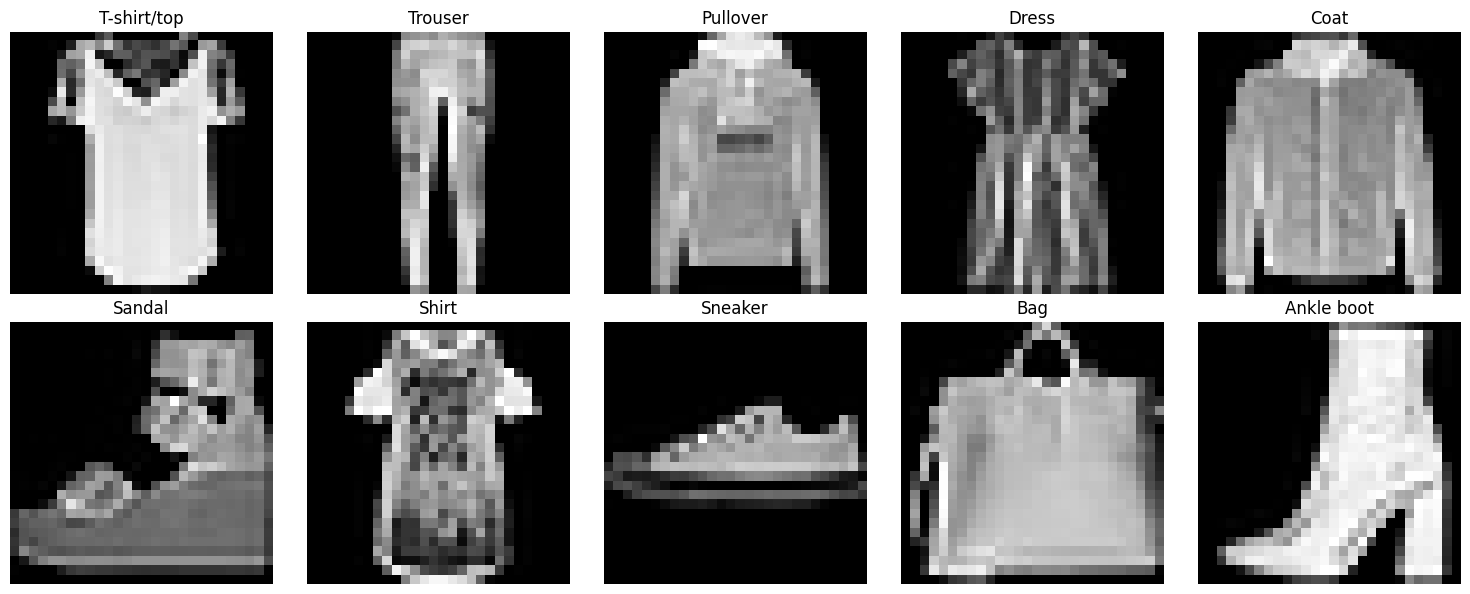

In [17]:
# Get a batch of data
data_iter = iter(train_iter)
images, labels = next(data_iter)

# Plot one image for each class
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i in range(10):
    # Find the index of the first image of each class
    index = (labels == i).nonzero(as_tuple=True)[0][0]
    image = images[index].squeeze(0)  # Get the image and remove the channel dimension
    axes[i // 5, i % 5].imshow(image, cmap='gray')  # Display as grayscale image
    axes[i // 5, i % 5].set_title(train_data.classes[i])
    axes[i // 5, i % 5].axis('off')

plt.tight_layout()
plt.show()

In [42]:
# Hyperparameters (You can adjust these)
input_size = 28 * 28  # 28x28 images
hidden_size1 = 128 # Number of neurons in the hidden layer1
hidden_size2 = 256 # Number of neurons in the hidden layer2
output_size = 10      # 10 classes in FashionMNIST
batch_size = 100      # Number of images per batch
learning_rate = 0.01
epochs = 10           # Number of training epochs

In [43]:
class SimpleANN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleANN, self).__init__()
        # Define the layers
        self.fc1 = nn.Linear(input_size, hidden_size1)  # First fully connected layer
        self.fc2 = nn.Linear(hidden_size1,hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)  # Output layer
        self.relu = nn.ReLU()  # ReLU activation function

    def forward(self, x):
        x = x.view(-1, input_size)  # Flatten the input image to 1D vector
        x = self.relu(self.fc1(x))  # Pass through the hidden layer
        x = self.relu(self.fc2(x))
        x = self.fc3(x)             # Pass through the output layer
        return x

In [44]:
# Instantiate the model
model = SimpleANN(input_size, hidden_size1,hidden_size2, output_size)
# Move the model to the correct device
model = model.to(device)
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()  # Cross entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [45]:
# Function to train the model
def train_model():
    model.train()  # Set the model to training mode
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in train_iter:
            inputs = inputs.to(device)
            labels = labels.to(device)
            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Print statistics
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_iter):.4f}, Accuracy: {100 * correct / total:.2f}%")

# Train the model
train_model()

Epoch [1/10], Loss: 0.5484, Accuracy: 80.44%
Epoch [2/10], Loss: 0.4394, Accuracy: 84.37%
Epoch [3/10], Loss: 0.4068, Accuracy: 85.59%
Epoch [4/10], Loss: 0.3984, Accuracy: 85.81%
Epoch [5/10], Loss: 0.3827, Accuracy: 86.19%
Epoch [6/10], Loss: 0.3730, Accuracy: 86.51%
Epoch [7/10], Loss: 0.3678, Accuracy: 86.64%
Epoch [8/10], Loss: 0.3553, Accuracy: 87.02%
Epoch [9/10], Loss: 0.3582, Accuracy: 87.06%
Epoch [10/10], Loss: 0.3500, Accuracy: 87.41%


In [46]:
def evaluate_model():
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # No need to calculate gradients during evaluation
        for inputs, labels in test_iter:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Evaluate the model
evaluate_model()

Test Accuracy: 60.83%
